In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import textwrap

pitch = pd.read_excel("corrected_pitch.xlsx")
# gk = pd.read_excel("corrected_gk.xlsx")

In [3]:
media = pitch["Transfer_value"].mean()
desviacion = pitch["Transfer_value"].std()

print(media, desviacion)

9231057.442081878 13855635.207318619


In [6]:
pitch["Transfer_value"].describe()

count    3.151000e+03
mean     9.231057e+06
std      1.385564e+07
min      1.000000e+03
25%      1.500000e+06
50%      4.000000e+06
75%      1.110000e+07
max      1.272000e+08
Name: Transfer_value, dtype: float64

In [2]:
pitch.head()

,Name,Exp_contr,Team_from,Team_to,Transfer_value,Position,Year,Age,Matches_pl,Matches_pl_LS,...,Shoots,Shoots_on_target,Tackles_won,Interceptions,GCA_BC,GCA_BC_LS,Yellow_cards,Red_cards,Country_from,Country_to
0,Aaron Connolly,11,Brighton,Hull City,1350000,Centre-Forward,2023,23,55,11,...,88,34,7,5,1,0,4,0,Inglaterra,Inglaterra
1,Aaron Hickey,24,Bologna,Brentford,14250000,Left-Back,2022,20,70,36,...,35,18,37,44,5,4,16,2,Italia,Inglaterra
2,Aaron Hickey,8,Heart of Midl.,Bologna,1700000,Left-Back,2020,18,24,22,...,12,5,0,0,0,0,7,1,Escocia,Italia
3,Aaron Leya Iseka,10,OFI Crete FC,CSKA-Sofia,1200000,Centre-Forward,2024,26,40,13,...,19,7,2,5,0,0,3,0,Grecia,Bulgaria
4,Aaron Mooy,34,Brighton,SH Port,4500000,Central Midfield,2020,29,101,33,...,107,28,131,76,17,7,11,1,Inglaterra,China


In [29]:
def list_reduced(lista, mains):
    new_list = []
    for c in lista:
        if c in mains:
            new_list.append(c)
        else:
            new_list.append("Otros")
    return new_list

mains = ["Inglaterra", "Francia", "España", "Italia", "Alemania", "Portugal", "Países Bajos", "Argentina", "Brasil"]

c_pitch_from_reduced = list_reduced(pitch.Country_from, mains)
c_pitch_to_reduced = list_reduced(pitch.Country_to, mains)

c_gk_from_reduced = list_reduced(gk.Country_from, mains)
c_gk_to_reduced = list_reduced(gk.Country_to, mains)

In [48]:
def dic_count(lista):
    dic = {}
    for c in lista:
        if c in dic:
            dic[c] += 1
        else:
            dic[c] = 1
    return dic

dic_country_from_pitch = dict(sorted(dic_count(c_pitch_from_reduced).items(), key=lambda item: item[1], reverse=True))
dic_country_to_pitch = dict(sorted(dic_count(c_pitch_to_reduced).items(), key=lambda item: item[1], reverse=True))

dic_country_from_gk = dict(sorted(dic_count(c_gk_from_reduced).items(), key=lambda item: item[1], reverse=True))
dic_country_to_gk = dict(sorted(dic_count(c_gk_to_reduced).items(), key=lambda item: item[1], reverse=True))

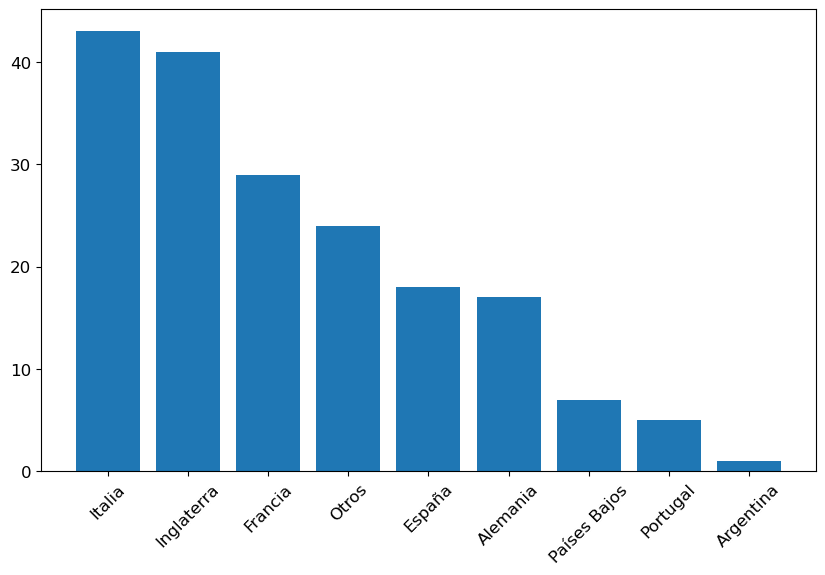

In [58]:
plt.figure(figsize=(10, 6))
plt.bar(dic_country_to_gk.keys(), dic_country_to_gk.values());
plt.xticks(rotation=45);

plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

In [7]:
# c_from_reduced

In [9]:
# plt.bar([0, 1])
dic_a = {}

for a in gk.Assists:
    if a not in dic_a:
        dic_a[a] = 1
    else:
        dic_a[a] += 1
        
dic_a

{0: 161, 1: 20, 2: 3, 3: 1}

([<matplotlib.axis.XTick at 0x1eda8d8f390>,
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

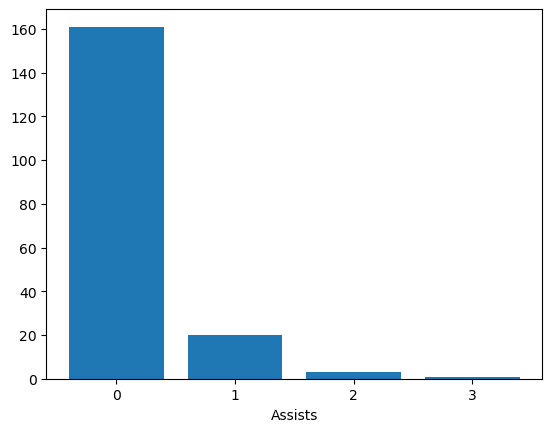

In [12]:
plt.bar(dic_a.keys(), dic_a.values())
plt.xlabel("Assists")
plt.xticks(range(0, 4, 1))

In [63]:
pitch.Exp_contr.describe().apply(lambda x: f"{x:,.0f}")

count    3,151
mean        22
std         12
min          3
25%         11
50%         22
75%         29
max         67
Name: Exp_contr, dtype: object

In [7]:
gk.Matches_pl_BC_LS.describe().apply(lambda x: f"{x:,.0f}")

count    185
mean      11
std       15
min        0
25%        0
50%        1
75%       24
max       41
Name: Matches_pl_BC_LS, dtype: object

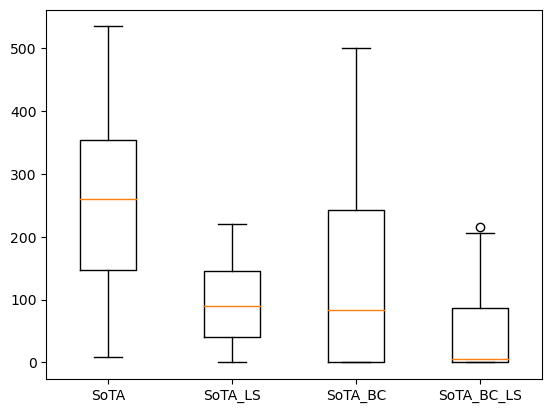

In [18]:
def code_boxplot(var):
    return f'plt.boxplot([gk.{var}, gk.{var}_LS, gk.{var}_BC, gk.{var}_BC_LS], labels=["{var}", "{var}_LS", "{var}_BC", "{var}_BC_LS"]);'

# code_boxplot('SoTA')
plt.boxplot([gk.SoTA, gk.SoTA_LS, gk.SoTA_BC, gk.SoTA_BC_LS], labels=["SoTA", "SoTA_LS", "SoTA_BC", "SoTA_BC_LS"]);

# plt.boxplot([gk.Tackles_won, gk.Interceptions], labels=["Tackles_won", "Interceptions"]);


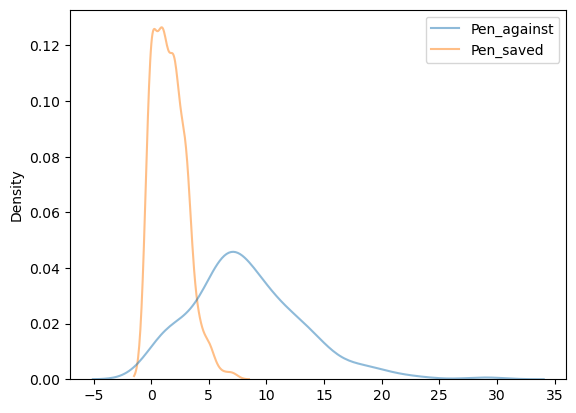

In [6]:
# def code_df(var):
#     return pd.DataFrame({
#         f'{var}': getattr(gk, var),
#         f'{var}_LS': getattr(gk, f'{var}_LS'),
#         f'{var}_BC': getattr(gk, f'{var}_BC'),
#         f'{var}_BC_LS': getattr(gk, f'{var}_BC_LS') 
#     })
    

# sns.kdeplot(data=code_df("GA"), fill=False, alpha=0.5);

df =pd.DataFrame({
        'Pen_against': getattr(gk, 'PKA'),
        'Pen_saved': getattr(gk, 'PKSv'),
    })

sns.kdeplot(data=df, fill=False, alpha=0.5);  # , bw_adjust=2
# sns.kdeplot(data=gk.CS, fill=False, alpha=0.5);  # , bw_adjust=2

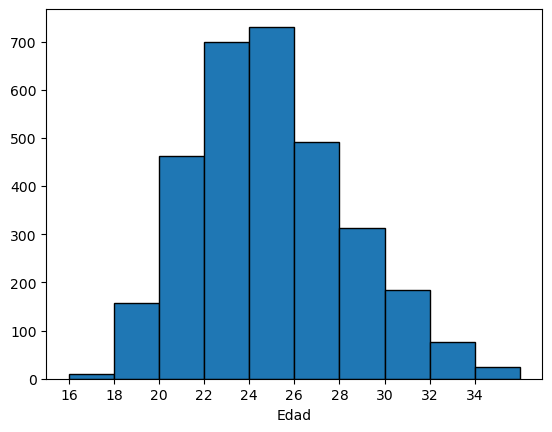

In [80]:
plt.hist(pitch.Age, bins=10, edgecolor='black');
plt.xlabel("Edad");
# plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1_000_000:.0f}M'));
plt.xticks(np.arange(16, 36, 2));

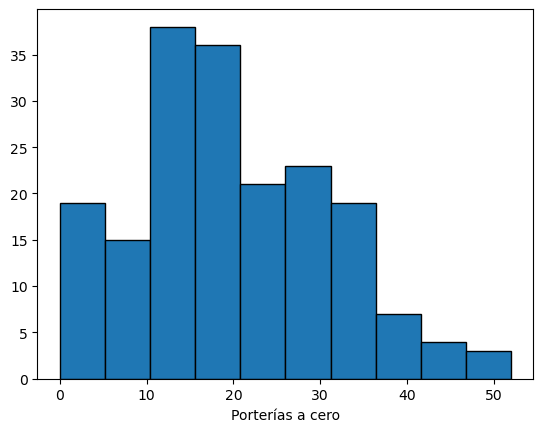

In [4]:
plt.hist(gk.CS, bins=10, edgecolor='black');
plt.xlabel("Porterías a cero");
# plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1_000_000:.0f}M'))
# plt.xticks(np.arange(18, 36, 2));

In [78]:
dic_position = {}

for p in pitch.Position:
    if p in dic_position:
        dic_position[p] += 1
    else:
        dic_position[p] = 1

dic_position["Goalkeeper"] = 185

In [79]:
dic_position = dict(sorted(dic_position.items(), key=lambda item: item[1], reverse=True))
dic_position

{'Centre-Forward': 650,
 'Centre-Back': 562,
 'Central Midfield': 398,
 'Left Winger': 297,
 'Right Winger': 270,
 'Defensive Midfield': 255,
 'Left-Back': 231,
 'Right-Back': 215,
 'Attacking Midfield': 186,
 'Goalkeeper': 185,
 'Second Striker': 39,
 'Left Midfield': 30,
 'Right Midfield': 18}

In [82]:
dic_years_gk = dict(sorted(dic_years_gk.items(), key=lambda item: item[0]))
dic_years_p = dict(sorted(dic_years_p.items(), key=lambda item: item[0]))

{2019: 36, 2020: 32, 2021: 26, 2022: 26, 2023: 36, 2024: 27}

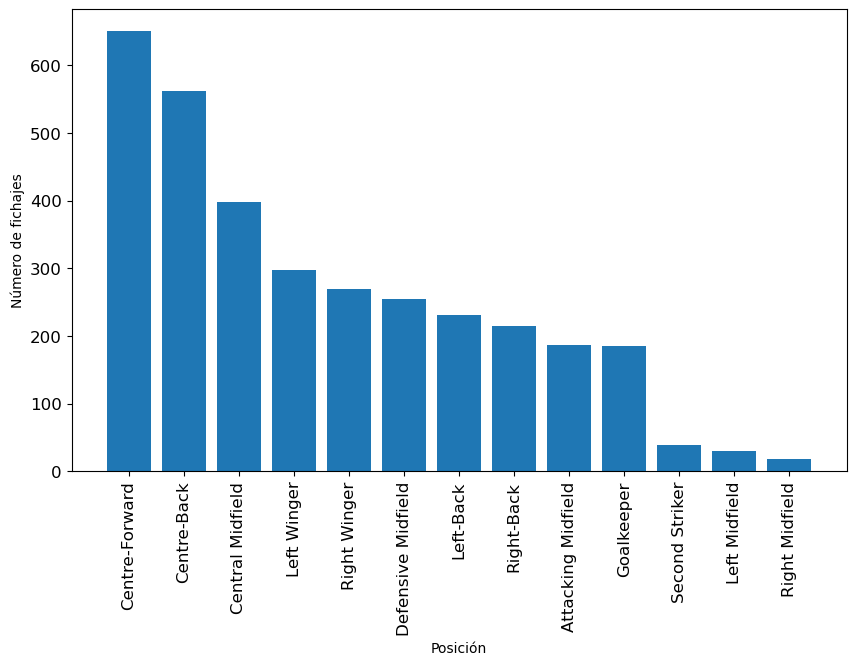

In [80]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90);

plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

plt.bar(dic_position.keys(), dic_position.values())
plt.xlabel("Posición");
plt.ylabel("Número de fichajes");



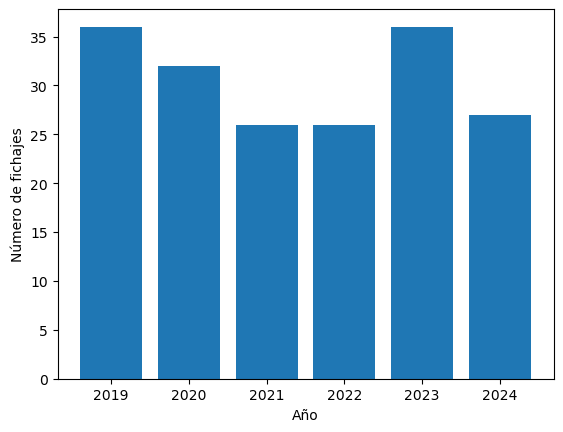

In [86]:
plt.bar(dic_years_gk.keys(), dic_years_gk.values())
plt.xlabel("Año");
plt.ylabel("Número de fichajes");

In [42]:
country_colors = {
    'España': 'red',
    'Francia': 'blue',
    'Alemania': 'black',
    'Italia': 'lightgreen',
    'Brasil': 'gold',
    "Inglaterra": "grey",
    "Países Bajos": "orange",
    "Portugal": "green",
    "Argentina": 'lightblue',
    "Otros": "chocolate"
}

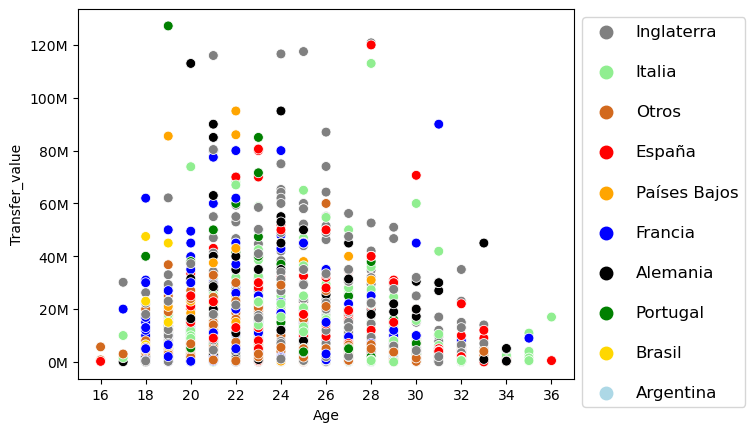

In [59]:
# palette = sns.color_palette("tab10", n_colors=len(pitch['Country_from'].unique()))

sns.scatterplot(data=pitch, 
                x='Age', 
                y='Transfer_value',
                hue='Reduced_from',  # Color según el número de estimadores
#                 style='Reduced_from',  # Forma según el número de componentes PCA
#                 edgecolor=knn_csv['K'].map({pca_value: color for pca_value, color in zip(knn_csv['K'].unique(), palette)}),
                s = 50,
                palette=country_colors)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1),  
               fontsize=12, markerscale=1.5, labelspacing=1.5)

plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1_000_000:.0f}M'))

plt.xticks(range(int(pitch['Age'].min()), int(pitch['Age'].max()) + 2, 2));

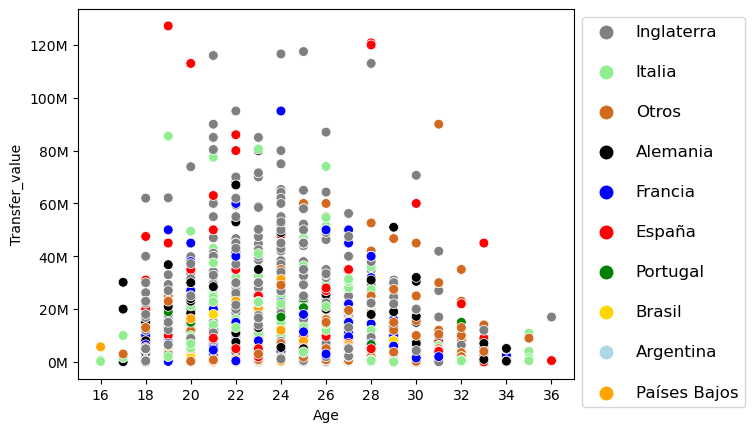

In [63]:
# palette = sns.color_palette("tab10", n_colors=len(pitch['Country_from'].unique()))

sns.scatterplot(data=pitch, 
                x='Age', 
                y='Transfer_value',
                hue='Reduced_to',  # Color según el número de estimadores
#                 style='Reduced_from',  # Forma según el número de componentes PCA
#                 edgecolor=knn_csv['K'].map({pca_value: color for pca_value, color in zip(knn_csv['K'].unique(), palette)}),
                s = 50,
                palette=country_colors)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1),  
               fontsize=12, markerscale=1.5, labelspacing=1.5)

plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1_000_000:.0f}M'))

plt.xticks(range(int(pitch['Age'].min()), int(pitch['Age'].max()) + 2, 2));

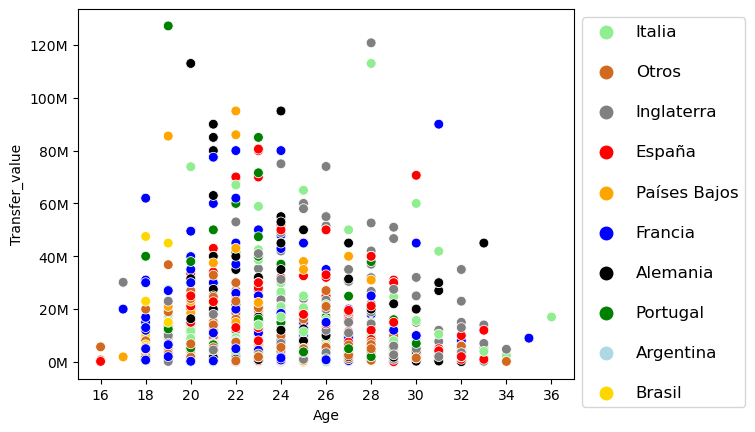

In [61]:
sns.scatterplot(data=pitch[pitch["Reduced_from"] != pitch["Reduced_to"]], 
                x='Age', 
                y='Transfer_value',
                hue='Reduced_from',  # Color según el número de estimadores
#                 style='Reduced_from',  # Forma según el número de componentes PCA
#                 edgecolor=knn_csv['K'].map({pca_value: color for pca_value, color in zip(knn_csv['K'].unique(), palette)}),
                s = 50,
                palette=country_colors)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1),  
               fontsize=12, markerscale=1.5, labelspacing=1.5)

plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1_000_000:.0f}M'))

plt.xticks(range(int(pitch['Age'].min()), int(pitch['Age'].max()) + 2, 2));

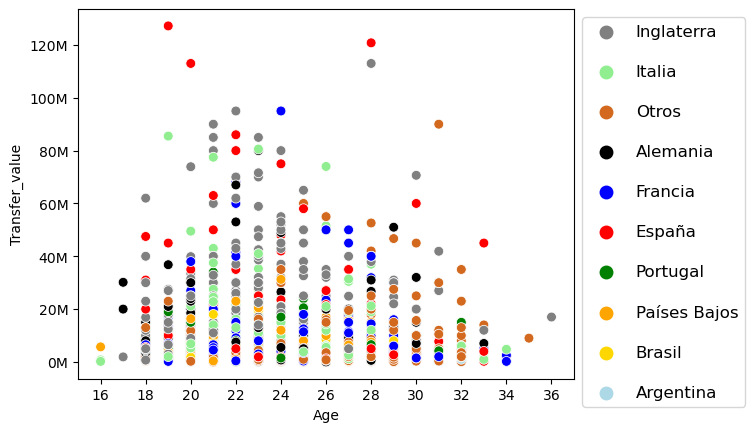

In [62]:
sns.scatterplot(data=pitch[pitch["Reduced_from"] != pitch["Reduced_to"]], 
                x='Age', 
                y='Transfer_value',
                hue='Reduced_to',  # Color según el número de estimadores
#                 style='Reduced_from',  # Forma según el número de componentes PCA
#                 edgecolor=knn_csv['K'].map({pca_value: color for pca_value, color in zip(knn_csv['K'].unique(), palette)}),
                s = 50,
                palette=country_colors)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1),  
               fontsize=12, markerscale=1.5, labelspacing=1.5)

plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1_000_000:.0f}M'))


plt.xticks(range(int(pitch['Age'].min()), int(pitch['Age'].max()) + 2, 2));